# Twitter Sentiment Analysis
The objective of this task is to detect hate speech in tweets. the task is to 
classify racist or sexist tweets from other tweets. For more info: https://www.kaggle.com/datasets/arkhoshghalb/twitter-sentiment-analysis-hatred-speech

`0` : Not a Hate Speech
`1` : Is a Hate Speech

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import pickle

from imblearn.under_sampling import NearMiss
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

## Loading & Exploring Data

In [24]:
df = pd.read_csv('data/train.csv')
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [26]:
df.nunique()

id       31962
label        2
tweet    29530
dtype: int64

In [27]:
df['label'].unique()

array([0, 1], dtype=int64)

In [28]:
def label_text(label):
    lab = df[df['label'] == label]
    
    return lab['tweet'].head()

In [29]:
label_text(1)

13    @user #cnn calls #michigan middle school 'buil...
14    no comment!  in #australia   #opkillingbay #se...
17                               retweet if you agree! 
23      @user @user lumpy says i am a . prove it lumpy.
34    it's unbelievable that in the 21st century we'...
Name: tweet, dtype: object

In [30]:
df.shape

(31962, 3)

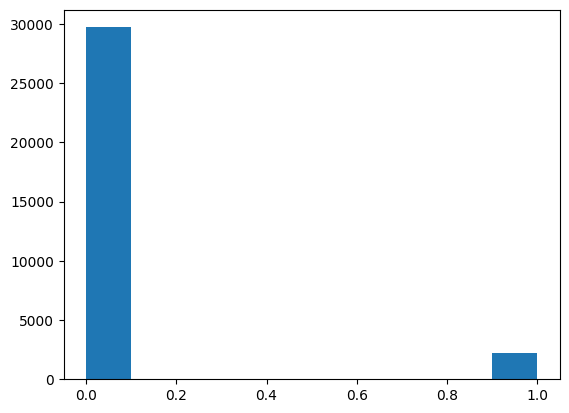

In [31]:
plt.hist(x=df['label']);

In [32]:
df['label'].value_counts()

label
0    29720
1     2242
Name: count, dtype: int64

## Preprocessing the data

In [33]:
df['tweet'].head()

0     @user when a father is dysfunctional and is s...
1    @user @user thanks for #lyft credit i can't us...
2                                  bihday your majesty
3    #model   i love u take with u all the time in ...
4               factsguide: society now    #motivation
Name: tweet, dtype: object

In [34]:
x = df['tweet'].replace("[^a-zA-Z]", " ", regex=True)
x = x.str.lower()
x.head()

0      user when a father is dysfunctional and is s...
1     user  user thanks for  lyft credit i can t us...
2                                  bihday your majesty
3     model   i love u take with u all the time in ...
4               factsguide  society now     motivation
Name: tweet, dtype: object

In [35]:
y = df['label']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int64

In [36]:
# Implementing Bag of Words
countvec = CountVectorizer(ngram_range=(1,1))
x_vec = countvec.fit_transform(x) 

In [37]:
x_vec.shape

(31962, 37543)

In [38]:
# Balancing the data
np.random.seed(42)
nm = NearMiss()
x_res, y_res = nm.fit_resample(x_vec, y)

In [39]:
x_res.shape, y_res.shape

((4484, 37543), (4484,))

## Creating Model & Making Predictions

In [40]:
clf_nb = MultinomialNB()

clf_nb.fit(x_res, y_res)

MultinomialNB()

In [41]:
test_df = pd.read_csv('data/test.csv')
test_df.head(2)

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...


In [42]:
test = test_df['tweet']
test

0        #studiolife #aislife #requires #passion #dedic...
1         @user #white #supremacists want everyone to s...
2        safe ways to heal your #acne!!    #altwaystohe...
3        is the hp and the cursed child book up for res...
4          3rd #bihday to my amazing, hilarious #nephew...
                               ...                        
17192    thought factory: left-right polarisation! #tru...
17193    feeling like a mermaid ð #hairflip #neverre...
17194    #hillary #campaigned today in #ohio((omg)) &am...
17195    happy, at work conference: right mindset leads...
17196    my   song "so glad" free download!  #shoegaze ...
Name: tweet, Length: 17197, dtype: object

In [43]:
test = test_df['tweet'].replace("[^a-zA-Z]", " ", regex=True)
test = test.str.lower()
test_vec = countvec.transform(test)
predictions = clf_nb.predict(test_vec)

In [44]:
test_df['predictions'] = predictions
test_df.head()

,id,tweet,predictions
0,31963,#studiolife #aislife #requires #passion #dedic...,1
1,31964,@user #white #supremacists want everyone to s...,1
2,31965,safe ways to heal your #acne!! #altwaystohe...,0
3,31966,is the hp and the cursed child book up for res...,1
4,31967,"3rd #bihday to my amazing, hilarious #nephew...",0


In [45]:
test_df.to_csv('output_file.csv', index=False)

In [46]:
## Trying on a more understandable data

hate_text = "Oh! I just s@aw a Dumb #guy#"

r = re.sub("[^a-zA-Z]", " ", hate_text)
r = r.lower()
r = countvec.transform([r])
preds = clf_nb.predict(r)
preds

array([1], dtype=int64)

## Saving the model & Count Vectorizer


In [47]:
with open('model.pkl', 'wb') as model_file:
    pickle.dump(clf_nb, model_file)


In [48]:
with open('vectorizer.pkl', 'wb') as vec_file:
    pickle.dump(countvec, vec_file)